Another exciting thing about deep neural networks is that the researchers designing them have produced python LIBRARIES that make it really easy to specify and train the networks.


Here’s an example of code from a library called “Keras”. It defines the VGG-16 network we were just talking about.
There are a few really cool things about this code. 

First, it lets you specify the architecture layer by layer just like the table. The lines match up perfectly to the high-level description.

Second, let’s take a minute to think about what happens under the hood. These statements defining the layers are actually building up an explicit representation of a huge parameterized function. A program. When it comes time to TRAIN this function by way of gradient descent, it’s necessary to take its derivative. That’s something you can’t really do on code in general, but these functions are constructing the network SYMBOLICALLY, so it’s possible for the gradient to be computed behind the scenes.

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D


input_shape = (224, 224, 3)
#Instantiate an empty model
model = Sequential([
Conv2D(64, (3, 3), input_shape=input_shape, padding="same", activation="relu"),
Conv2D(64, (3, 3), activation="relu", padding="same"),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(128, (3, 3), activation="relu", padding="same"),
Conv2D(128, (3, 3), activation="relu", padding="same",),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(256, (3, 3), activation="relu", padding="same",),
Conv2D(256, (3, 3), activation="relu", padding="same",),
Conv2D(256, (3, 3), activation="relu", padding="same",),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(512, (3, 3), activation="relu", padding="same",),
Conv2D(512, (3, 3), activation="relu", padding="same",),
Conv2D(512, (3, 3), activation="relu", padding="same",),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(512, (3, 3), activation="relu", padding="same",),
Conv2D(512, (3, 3), activation="relu", padding="same",),
Conv2D(512, (3, 3), activation="relu", padding="same",),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Flatten(),
Dense(4096, activation="relu"),
Dense(4096, activation="relu"),
Dense(1000, activation="softmax")
])
model.summary()
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam", metrics=["accuracy"])

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

When we run the function, it shows us that the whole network consists of 138 million trainable weights.

Unfortunately --- or maybe fortunately --- we’re not going to train it now. That’s because VGG-16 takes WEEKS to train using heaps of specialized high performance graphical processing units.
That’s another thing that’s cool about Keras and other deep learning packages. They are optimized to take advantage of fast hardware. On the other hand, if you don’t have that hardware, it’s not much of an advantage.

But, all is not lost. 

VGG-16 was trained to recognize the 1000 imagenet categories that include types of animals, plants, human-made objects, geological formations, and more.

We have access to a trained version of VGG-16 that we can use to recognize objects in any of these categories. But, even more importantly, VGG-16’s learned internal feature representation can be used to build recognizers for NEW objects without having to train it from scratch. 

We can generalize BEYOND the 1000 classes that the original competition was built around and learn to recognize categories of objects that they didn’t think to include: fidget spinners, Tesla cars, nearly forgotten characters from cheesy monster movies from the 1950s. Yeah, let’s do that last one.

Growing up in the Philadelphia area in the 1970s, I watched a TV show on Saturdays called “Creature Double Feature”. Each week, they’d put on two monster movies, back to back. Godzilla was a pretty frequent choice. I probably had this show on my mind for this lesson because we talked about “double features” --- raw and convolutional features in images.

Anyway, I never got great at telling Godzilla and his enemies apart. Which one is Titanosaurus? Which one is Gigan (“GUY-Gan”)? I don’t know. They all kind of look like Godzilla to me. They all have snouts and stand on two legs. They are kind of greenish gray and I think they all have some kind of fins on their backs.
Anyway, it might have been helpful back then if I had some kind of recognition aid that could help me tell the different monsters apart.

I think technology is up to the task now.
I pulled about a dozen images each of Gozilla and Gigan off of youtube and split them into training and testing sets

I imported a half dozen packages from keras and one from numpy for some matrix manipulation.



In [0]:
from keras.models import Model
from keras.layers import Dense,Flatten
from keras.applications import vgg16
from keras import backend as K
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np 


I then loaded the parameters --- the weights --- for vgg-16. Note that it was trained to recognize dogs and cats and scissors and many other things. But, no Godzilla or friends.

In [0]:
model = vgg16.VGG16(weights='imagenet', include_top=True)

I then surgically removed the final two layers that do the classification and left all the previous layers that define the feature set.

In [0]:
model2 = Model(model.input, model.layers[-2].output)

I read in 10 images each of Godzilla and Gigan.

The “image.load_img” function does the work of converting the jpeg image file into consistent 224 x 224 matrices.

The input and model2.predict commands convert each image into a 4096 component vector. Those are our vgg-16 features.

We store away the vector and the labels.

In [0]:
import requests
from io import BytesIO
from PIL import Image
from IPython.display import display
from google_drive_downloader import GoogleDriveDownloader as gdd


image_prefix = "https://drive.google.com/uc?export=download&id="
image_ids = {
            "1lbqEONv__U1i4upgWWbM6SwpVYBaTvTw": "godz1",
            "1KSTWm3u-vQgMwjrmm2ROtIxexVgL9tjI":"godz2",
            "1u4sII2lpAaEgCJpOUIh0rI3WJNS65Cf4": "godz3",
             "1AQOagvYAxpxn-kEhzIZEU2x0vkvb6hTp":"godz4",
             "1fsBRP7ZrTA-8hJoObZqvhxVfMTdZ8KNy": "godz5",
             "1b3RAIeqg8pD2DIYvmn0YPXXn0pBkn4AM": "godz6", 
            "1glp10Njqkij3Ks72HqW6vx7ZRwLcByhT": "godz7",
             "1qi8QYyn5_DiS_6RM42N5Edl8rHWhOn-t": "godz8",
            "1ghHOEtpGJUzuEglTh4iaXclcc2IZdC1Q": "godz9",
             "1PKm15enryWh4DGavXpOf2RlApL5iR7qr":"godz10",
             #"1LmCSSL-RFjfWGR6nK2f6QRBCNpOsjQ_F": "godz11",
            "1DnlvMEwUJ-afwbb5bhkuSZUxvvsETAoE": "gigan1",
             "12itJfMJ0MBg4A-yRnpheiAkaGJgEn9SH": "gigan2",
             "1i7-wFjpnlAYc_GIJNkW3oweXCIF7S_wz": "gigan3", 
             "1Wd-qOY0wzom0neSPh4tZaPnXX1raymOR": "gigan4",
             "1oiTU45xeRR9ex9oay_mTp7YclmtoxUiE": "gigan5",
             "1NhToRR4KLU5Aly0ApFwKlc1vYY9UmWIs": "gigan6",
             "10IOx_nmVHR2YLiHjMaomi5gpPWMMt8U5": "gigan7",
             "1PuUzzC7v6ABndCtiQ9m20spFx42Ik2uz": "gigan8",
             "1fpB0oV6RVM5YurTklyzsXa8XKpMt9P19": "gigan9",
             "1Q_3brXCfgCa5uVqJ3CvPE1MR0goXps-h": "gigan10",
             #"1wwusOMTj79nDkZcLxTt5J_nFkXqZQ7Hg": "gigan11",
             #"1ibwKoO0f5cKk5admi1-lZqlIOc-0ZpOt": "gigan12",
             #"1GRIL3rO2u6nUrm62qJNzJVzD-yCyMCm3": "gigan13",
             #"1TvVsKeu44pb1NxLCe7z1ICa3lefxVcoa": "gigan14",
             #"11fLlMhr6sWPLKA6dQjNkuq6Nh2HQl-gn" : "gigan15"
             }
            
dat = []
labs = []
imgs = []
for ids, files in image_ids.items():
  print(files)
  gdd.download_file_from_google_drive(file_id=ids, dest_path='./images/{}.jpg'.format(files),  overwrite=True)
  img = image.load_img('images/{}.jpg'.format(files), target_size=(224,224))
  imgs.append(img)
  img_arr = np.expand_dims(image.img_to_array(img), axis=0)
  x = preprocess_input(img_arr)
  preds = model2.predict(x)
  dat.append(preds[0])
  labs.append(("godz" in files))

godz1
godz2
godz3
godz4
godz5
godz6
godz7
godz8
godz9
godz10
gigan1
gigan2
gigan3
gigan4
gigan5
gigan6
gigan7
gigan8
gigan9
gigan10


We use the first 5 Godzilla and the first 5 Gigan images for training and the remaining 10 images for testing.

In [0]:
train = [i for i in range(0,5)]+[i for i in range(10,15)]
test = [i for i in range(5,10)]+[i for i in range(15,20)]

For each test image, we loop through the training images computing the dot product of the feature vectors using the “@” command. Whichever test image has the highest dot product is retained as bestj. We could also have used the nearest neighbor package for this purpose.

Then, we display the image and its nearest neighbor.

I wasn’t very confident that this would work, but it’s actually pretty striking. Here are the nearest neighbors for 3 Godzilla images. The VGG-16 trained features accurately pick out Godzilla, even though there were no Godzilla images in its training set.

pair 5


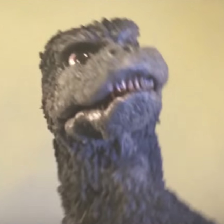

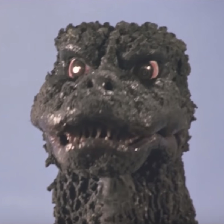

 
pair 6


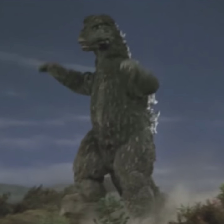

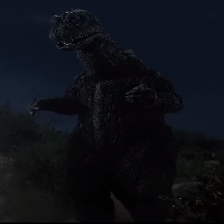

 
pair 7


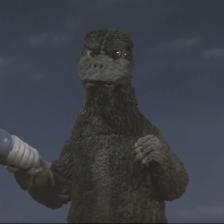

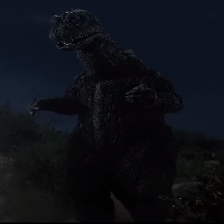

 
pair 8


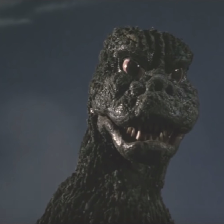

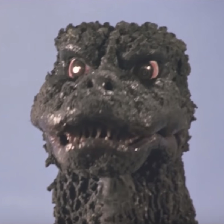

 
pair 9


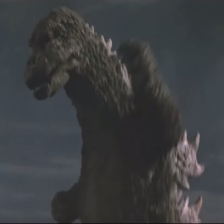

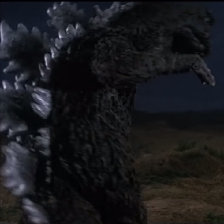

 
pair 15


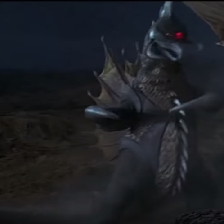

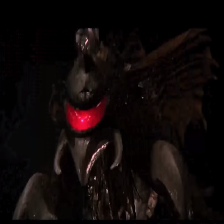

 
pair 16


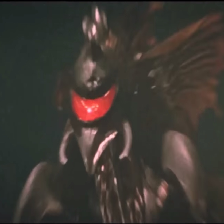

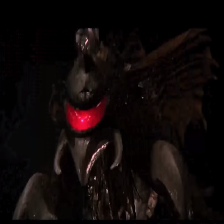

 
pair 17


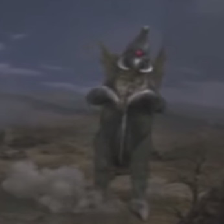

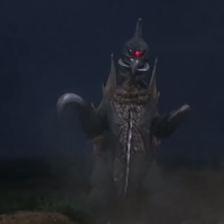

 
pair 18


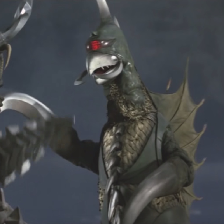

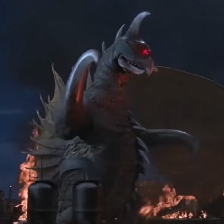

 
pair 19


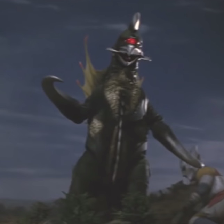

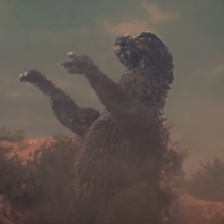

In [0]:
for i in test:
  bestj = -1
  bestdist = 0
  for j in train:
    if i != j: 
      dist = dat[i] @ dat[j]
      if dist > bestdist: bestj, bestdist = j, dist
  print("pair {}".format(i))
  display(imgs[i])
  display(imgs[bestj])
  print(" ")

In this example, we used a machine-learning classifier trained for one problem --- VGG-16 recognizing 1000 different image categories in imagenet --- to solve a related but distinct problem --- distinguishing Godzilla and Gigan. Within the machine-learning community, this repurposing idea is known as “transfer” learning. A big advantage of transfer learning is that a new machine-learning problem can be solved with only a small amount of new data and computation by leveraging previous processing of large amounts of other data. In this case, we created a great monster recognizer with only 10 training images. It’s hard to imagine how to better leverage small amounts of data to such great effect!
 It’s still a bit of an art form to know which previously trained systems to use for transfer. Imagenet includes dozens of categories of creatures --- bugs, dogs, bears, lobsters, monkeys. It needed to learn visual features for characterizing all of these classes. Those same visual features are probably helpful for characterizing monsters as well.

But, what if you have a trained network for recognizing different types of trucks. Could transfer learning be used to repurpose this network to distinguish types of fish? Maybe not. Although, I’d bet that would be a good head start on recognizing Transformer robots...

Now, the point here is not about monster characters. I wanted to illustrate that the deep-learning features that come out of networks like VGG-16 really do a great job of capturing a notion of visual similarity for objects. You can see that it even prefers images in similar poses. Amazing stuff. 

So,  deep neural networks, with many layers arranged to identify and exploit translation-invariant features, can produce state-of-the-art image-classification results. When these results started to appear, it was impossible to ignore deep networks as an essential tool for solving difficult computational problems. First the imagenet challenge, the overwhelming majority of work in the computer vision field, was dominated by convolutional deep networks after 2015.

With the phenomenal success of deep networks in computer vision, it was inevitable that other areas of artificial intelligence and computer science would take notice. 

In upcoming lessons, we’ll explore the impacts of deep neural networks on text processing and speech processing, where the machine-learning revolution has been just as transformative.
